In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

import elephant
import quantities as pq
import neo
import viziphant


from drn_interactions.spikes import SpikesHandler
from drn_interactions.load import load_derived_generic, load_neurons

<AxesSubplot:xlabel='session_name'>

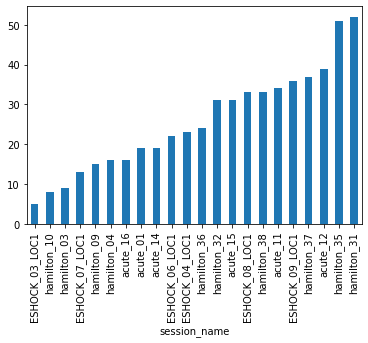

In [2]:
neurons = load_neurons()
neurons.groupby("session_name").apply(len).sort_values().plot(kind="bar")

In [38]:
from elephant.conversion import BinnedSpikeTrain
from elephant.cell_assembly_detection import cell_assembly_detection

t_start= 0
t_stop = t_start + 600
session_name = "hamilton_32"
bin_width = 500

sh = SpikesHandler(block="pre", bin_width=bin_width / 1000, session_names=[session_name], t_stop=t_stop, t_start=t_start)
spiketrains = [
    neo.SpikeTrain(
        group["spiketimes"].values, 
        t_stop=t_stop, 
        units=pq.sec, 
        description=name,
        t_start=t_start
    ) 
    for name, group in sh.spikes.groupby("neuron_id")
    ]

bst = BinnedSpikeTrain(spiketrains, bin_size=bin_width * pq.ms)
bst.rescale("ms")

In [45]:
patterns = cell_assembly_detection(bst, max_lag=5, significance_pruning=False, )

In [40]:
# viziphant.patterns.plot_patterns(
#     spiketrains, 
#     patterns=patterns,
#     circle_sizes=(3, 30, 40))

In [46]:
len(patterns)

37

In [47]:
max([len(d["neurons"]) for d in patterns])

3